## Movies Database

### Start Virtual Environment and install 

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("data/tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Data Cleaning

In [6]:
# check dtypes of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.shape

(10866, 21)

In [8]:
# remove duplicates 
df_cleaned = df.drop_duplicates()

In [9]:
# check NaNs
df_cleaned.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# remove columns: id, homepage 
df_cleaned = df_cleaned.drop(['id', 'homepage'], axis=1)
df_cleaned.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Univariate and Bivariate Analysis 

### Variable: Vote count

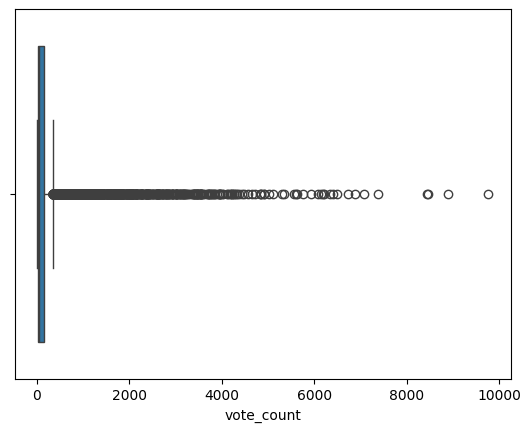

In [17]:
# visualize outliers 
sns.boxplot(x=df_cleaned['vote_count'])
plt.show()

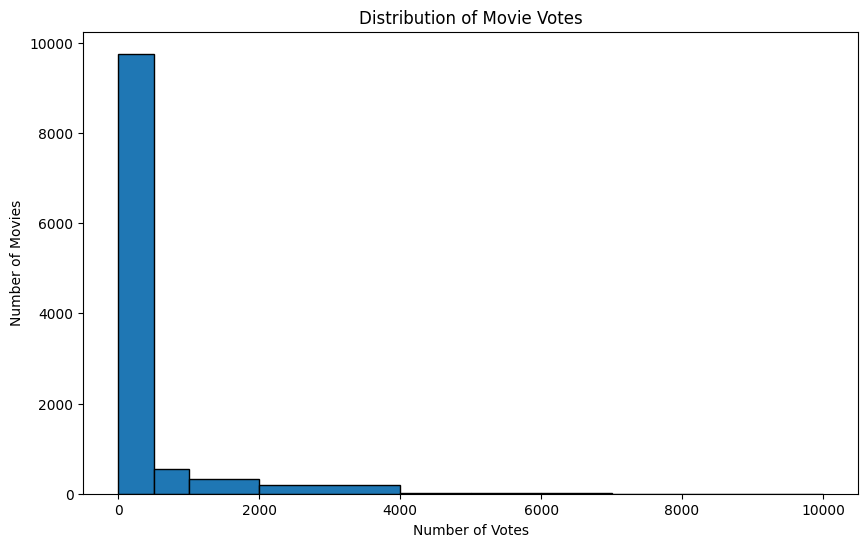

In [12]:
# Create the histogram with appropriate bins (you can adjust the bin sizes as needed)
bins = [0, 500, 1000, 2000, 4000, 5000, 6000, 7000, 8000, 10000]

# Plotting the histogram
plt.figure(figsize=(10,6))
plt.hist(df_cleaned['vote_count'], bins=bins, edgecolor='black')
plt.title('Distribution of Movie Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.show()

In [18]:
# Define the bins for vote counts
bins = [0, 1, 100, 500, 1000, 5000, 10000]
labels = ['0 votes', '1-100 votes', '101-500 votes', '501-1000 votes', '1001-5000 votes', '5001-10000 votes']
# Create a new column with binned vote counts
df_cleaned['vote_group'] = pd.cut(df_cleaned['vote_count'], bins=bins, labels=labels, right=False)

# Create a summary of how many movies are in each group
vote_summary = df_cleaned['vote_group'].value_counts().sort_index()

# Display the summary
print(vote_summary)


vote_group
0 votes                0
1-100 votes         7537
101-500 votes       2219
501-1000 votes       545
1001-5000 votes      540
5001-10000 votes      24
Name: count, dtype: int64


### Variables: Vote Count, Budget and Profit 

- Movies that received more votes, had also a higher budget and revenue, resulting in higher profits. 

In [24]:
# Create a new column 'profit' by subtracting 'budget' from 'revenue'
df_cleaned['profit'] = df_cleaned['revenue'] - df_cleaned['budget']

# Display the first few rows to confirm the new column
print(df_cleaned[['budget', 'revenue', 'profit']].head())

      budget     revenue      profit
0  150000000  1513528810  1363528810
1  150000000   378436354   228436354
2  110000000   295238201   185238201
3  200000000  2068178225  1868178225
4  190000000  1506249360  1316249360


In [36]:
# Disable scientific notation in pandas
pd.options.display.float_format = '{:,.0f}'.format

# Group the data by 'vote_group' and calculate the mean budget and mean profit for each group
grouped_summary = df_cleaned.groupby('vote_group', observed=False).agg({
    'budget': 'mean',
    'profit': 'mean'
})

# Display the results
print(grouped_summary)




                      budget      profit
vote_group                              
0 votes                  NaN         NaN
1-100 votes        4,266,981     203,676
101-500 votes     23,924,034  28,790,805
501-1000 votes    47,034,844  97,541,911
1001-5000 votes   82,581,865 253,629,374
5001-10000 votes 142,375,000 761,843,698


### Popularity 

- approx. 90% of total movies received a score of 1. 

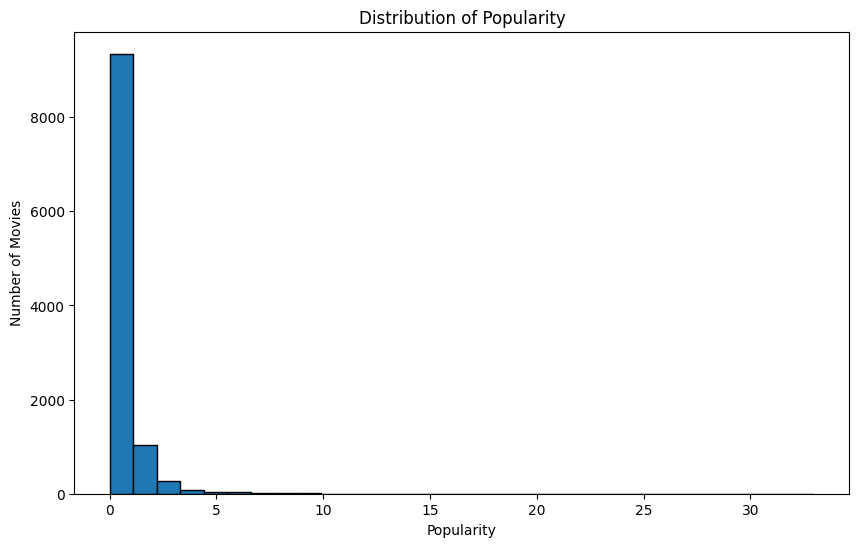

In [26]:
# Plot a histogram of the 'popularity' column
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['popularity'], bins=30, edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')
plt.show()

### Popularity & Budget 

- The graph below doesn't show a linear relationship between Popularity and Budget, suggesting that just because a movie was ranked more popular that didn't mean that it was due to a higher budget. 

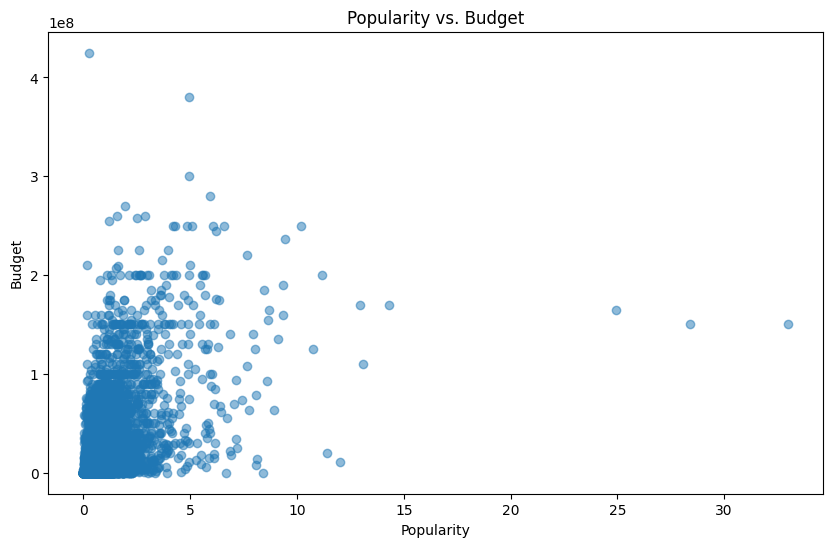

In [28]:
# Create a scatter plot to visualize the relationship between popularity and budget
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['popularity'], df_cleaned['budget'], alpha=0.5)
plt.title('Popularity vs. Budget')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show()


### Popularity and Profits 

- There's a moderate positive correlation between popularity and profit, meaning that the higher a movie scores in popularity, the more money it makes. 

In [40]:
# Calculate the correlation coefficient between popularity and profit
correlation_r_value = df_cleaned['popularity'].corr(df_cleaned['profit'])

# Display the result
print(f"Correlation between Popularity and Profit: {correlation_r_value:.2f}")

Correlation between Popularity and Profit: 0.63


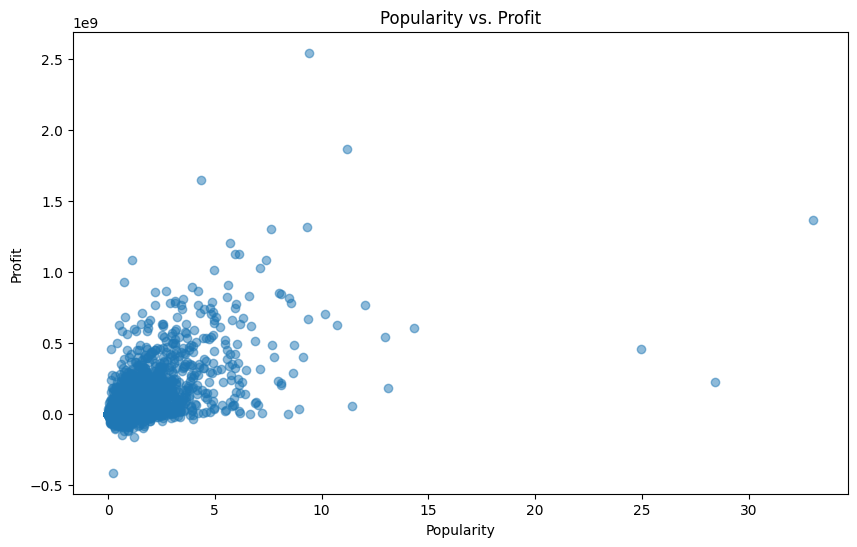

In [39]:
# Create a scatter plot to visualize the relationship between popularity and budget
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['popularity'], df_cleaned['profit'], alpha=0.5)
plt.title('Popularity vs. Profit')
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.show()


### Release Year

- Overall, profit for the movie industry steadily increased from 1960 to 2010. 

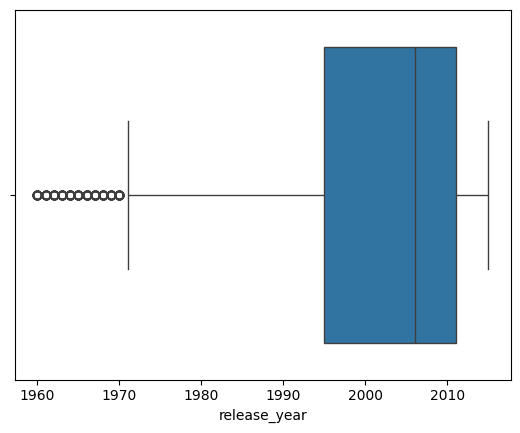

In [29]:
# Visualize  
sns.boxplot(x=df_cleaned['release_year'])
plt.show()

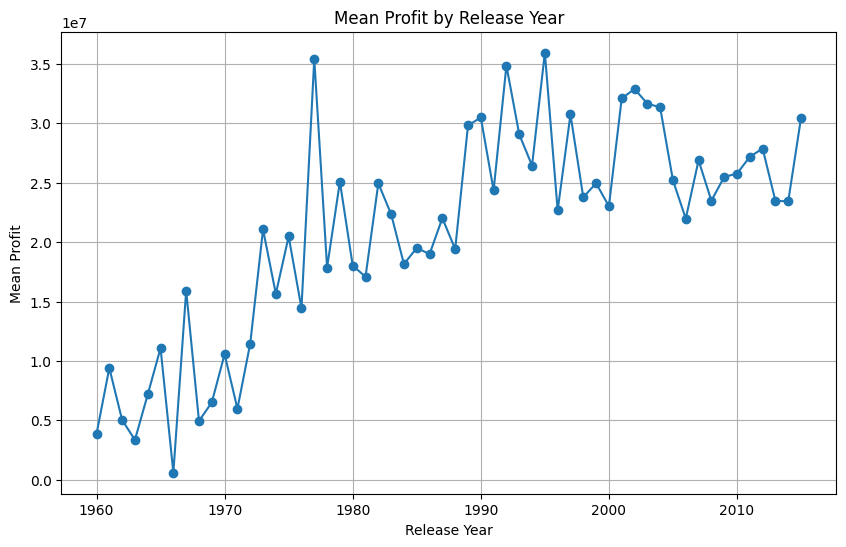

In [31]:
# Plot the mean profit by release year
plt.figure(figsize=(10, 6))
mean_profit_by_year.plot(kind='line', marker='o')
plt.title('Mean Profit by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Mean Profit')
plt.grid(True)
plt.show()


### Runtime 

- There's no correlation between runtime and vote count and runtime and popularity. 

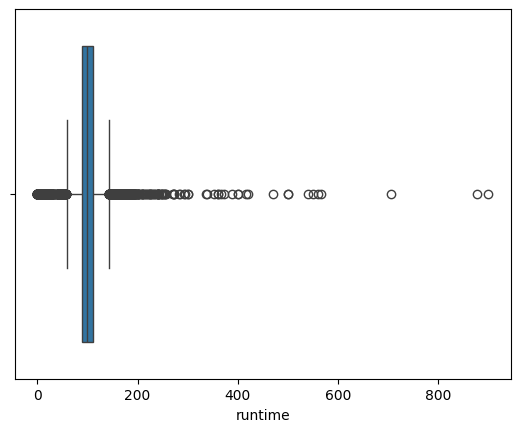

In [32]:
# Visualize ouliers 
sns.boxplot(x=df_cleaned['runtime'])
plt.show()

In [33]:
# Remove movies with runtime greater than 400 minutes, as likely to be a data entry error. 
df_removed = df_cleaned[df_cleaned['runtime'] <= 400]

- It looks like there's no correlation between runtime and vote-count nor between runtime and popularity
- There's a correlation between vote count and popularity

In [41]:
# Extract the relevant columns from the DataFrame
correlation_data = df_removed[['runtime', 'vote_count', 'popularity']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

            runtime  vote_count  popularity
runtime           1           0           0
vote_count        0           1           1
popularity        0           1           1


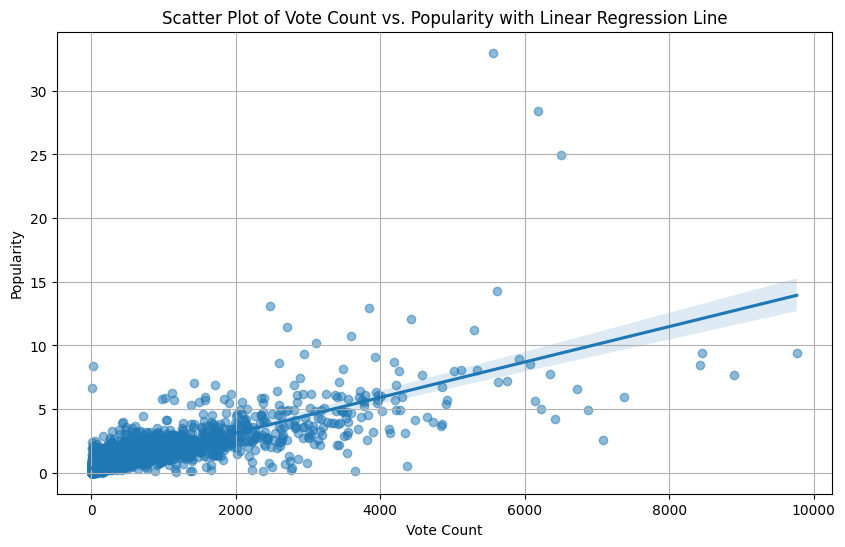

In [42]:
# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='vote_count', y='popularity', data=df_removed, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Vote Count vs. Popularity with Linear Regression Line')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

### Top 10 revenue movies 

### Features associated with these top movies 

- Of the numerical variables, only 'profit' seems to be correlated with revenue. 

In [44]:
# Get the top 10 movies by revenue
top_10_movies = df_removed.nlargest(10, 'revenue')
top_10_movies

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_group,profit
1386,tt0499549,9,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7,2009,"240,886,903","2,827,123,750",5001-10000 votes,2544505847
3,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,"183,999,919","1,902,723,130",5001-10000 votes,1868178225
5231,tt0120338,4,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",...,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7,1997,"271,692,064","2,506,405,735",1001-5000 votes,1645034188
4361,tt0848228,8,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,...,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7,2012,"208,943,742","1,443,191,435",5001-10000 votes,1299557910
0,tt0369610,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,"137,999,939","1,392,445,893",5001-10000 votes,1363528810
4,tt2820852,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,"174,799,923","1,385,748,801",1001-5000 votes,1316249360
14,tt2395427,6,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,...,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7,2015,"257,599,887","1,292,632,337",1001-5000 votes,1125035767
3374,tt1201607,6,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",...,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,8,2011,"121,174,755","1,287,183,998",1001-5000 votes,1202817822
5422,tt2294629,6,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,...,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,8,2013,"140,405,003","1,192,711,491",1001-5000 votes,1124219009
5425,tt1300854,5,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,Unleash the power behind the armor.,terrorist|war on terror|tennessee|malibu|marve...,When Ton

In [50]:
# Select features to keep (exclude certain variables)
variables_to_keep = ['popularity', 'budget','revenue', 'vote_count', 'release_year', 'profit']
filtered_top_10_movies = top_10_movies[variables_to_keep]


In [51]:
correlation_matrix = filtered_top_10_movies.corr()
print(correlation_matrix['revenue'])


popularity      0
budget          0
revenue         1
vote_count      0
release_year   -0
profit          1
Name: revenue, dtype: float64


### Genres most popular from year to year. 

In [52]:
# Split the 'genres' column and explode it into separate rows
df_genres = df_removed.assign(genres=df_removed['genres'].str.split('|')).explode('genres')


In [53]:
# Count the occurrences of each genre per year
genre_counts = df_genres.groupby(['release_year', 'genres']).size().reset_index(name='count')


In [54]:
# Get the most popular genre for each year
most_popular_genres = genre_counts.loc[genre_counts.groupby('release_year')['count'].idxmax()]


In [55]:
print(most_popular_genres)


      release_year  genres  count
4             1960   Drama     13
21            1961   Drama     16
37            1962   Drama     21
53            1963  Comedy     13
72            1964   Drama     20
90            1965   Drama     20
106           1966  Comedy     16
124           1967  Comedy     17
143           1968   Drama     20
160           1969   Drama     13
179           1970   Drama     19
198           1971   Drama     30
217           1972   Drama     16
233           1973   Drama     31
251           1974   Drama     21
270           1975   Drama     17
287           1976   Drama     22
307           1977   Drama     24
325           1978   Drama     29
344           1979   Drama     30
359           1980   Drama     32
379           1981   Drama     32
397           1982   Drama     33
416           1983   Drama     35
436           1984   Drama     40
451           1985  Comedy     51
469           1986   Drama     51
484           1987  Comedy     57
502           

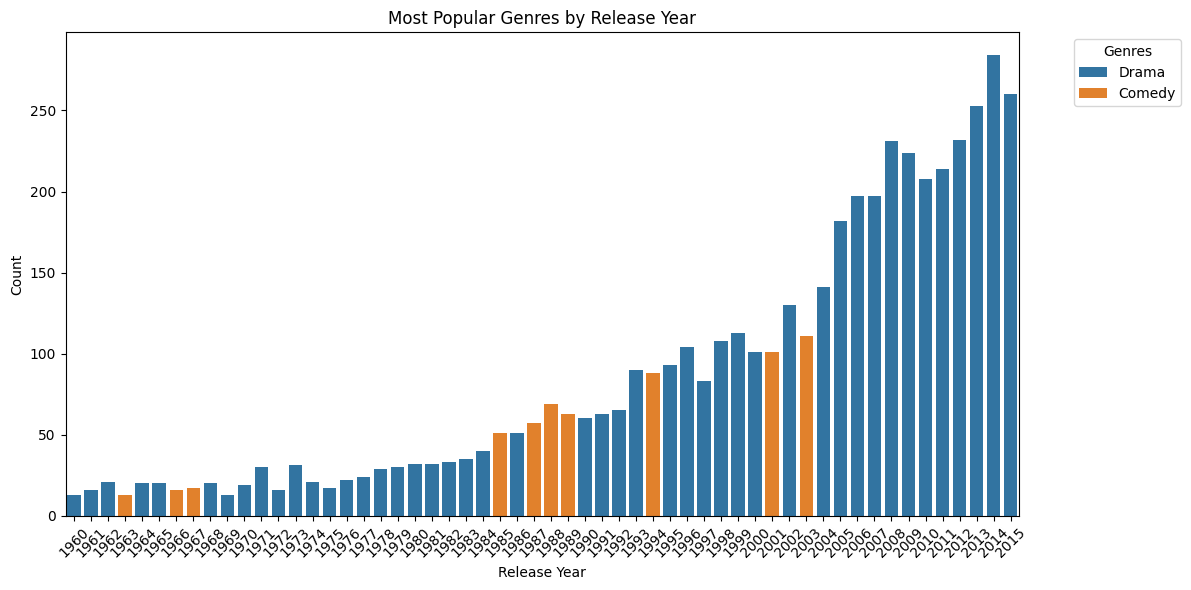

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for the most popular genres over the years
plt.figure(figsize=(12, 6))
sns.barplot(data=most_popular_genres, x='release_year', y='count', hue='genres')
plt.title('Most Popular Genres by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
